In [4]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [5]:
class individuo:
    x = []
    f1 = 0
    f2 = 0
    f = 0
    s = 0
class powerLaw:
    def generate(self, alpha, mult):
        nd = random.random()*2;
        if nd >= 1:
            return mult*math.pow((2-nd),(1/(1-alpha)))
        else:
            return -mult*math.pow((nd),(1/(1-alpha)));

In [6]:
#UR
class urf1:
    def f(self,x):
        suma = 0
        n=len(x)
        for i in range(0,n-1):
            suma += -10*math.exp(-0.2*math.sqrt(x[i]**2 + x[i+1]**2))
        return suma
class urf2:
    def f(self,x):
        suma = 0
        n = len(x)
        for i in range(0, n):
            suma += abs(x[i])**0.8 + math.sin(x[i])**3
        return suma
#QV
class qvf1:
    def f(self,x):
        suma = 0
        n=len(x)
        for i in range(0,n):
            suma += x[i]**2-10*math.cos(2*math.pi*x[i])+10
        return (suma/n)**0.25
class qvf2:
    def f(self,x):
        suma = 0
        n = len(x)
        for i in range(0, n):
            suma += (x[i]-1.5)**2-10*math.cos(2*math.pi*(x[i]-1.5)) +10
        return (suma/n)**0.25
class zdt6f1:
    def f(self,x):
        return 1-math.exp(-4*x[0])*math.sin(6*math.pi*x[0])**6
class zdt6g:
    def f(self,x):
        suma = 0
        for i in range(1,1):
            suma += x[i]
        return 1 + ()

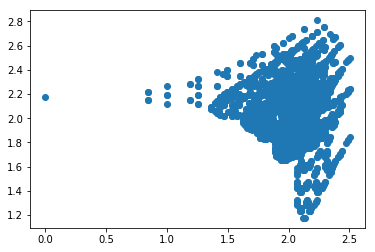

In [19]:
a=-5
b=5
x = np.arange(a,b,0.2)
y = np.arange(a,b,0.2)
f1 = qvf1()
f2 = qvf2()
f1v = []
f2v = []
for i in range(0, len(x)):
    for j in range(0, len(y)):
        f1v.append(f1.f([x[i],y[j]]))
        f2v.append(f2.f([x[i],y[j]]))
plt.plot(f1v,f2v,'o')

In [9]:
len(f2v)

1600

In [20]:
class spea2:
    def iniciarPoblacion(self, n, p, f1, f2):
        for i in range(0,n):
            temp = individuo()
            x = []
            for j in range(0,d):
                x.append(randpl.generate(alpha,multpl))
            temp.x = x
            temp.f1 = f1.f(x)
            temp.f2 = f2.f(x)
            p.append(temp)
        self.calcularFuerza(p, f1, f2)
        self.calcularFitness(p, f1, f2)
        pass
    def calcularFuerza(self, p, f1, f2):
        for i in range(0,len(p)):
            for j in range(0,len(p)):
                if p[i].f1 < p[j].f1:
                    if p[i].f2 < p[j].f2:
                        p[i].s = p[i].s + 1
        pass
    def calcularFitness(self, p, f1, f2):
        for i in range(0,len(p)):
            for j in range(0,len(p)):
                if p[j].f1 < p[i].f1:
                    if p[j].f2 < p[i].f2:
                        p[i].f = p[i].f + p[j].s + 1
        pass
    def tomarArchivo(self, p, pp, npp):
        t = p + pp
        t.sort(key=lambda t: t.f)
        r = t[0:npp].copy()
        return r
    def cruce(self,pp,p,n, f1, f2):
        np = []
        for i in range(0,n):
            temp = individuo()
            xn = []
            pos1 = int(random.uniform(0, len(pp)-1))
            p1 = pp[pos1]
            pos2 = int(random.uniform(0, len(p)-1))
            p2 = p[pos2]
            alphas = []
            alphasum = 0
            for j in range(0,d):
                alph = random.random()
                alphas.append(alph)
                alphasum += alph
            for j in range(0,d):
                alphas[j] = alphas[j]/alphasum
            for j in range(0,d):
                xn.append(p1.x[j]*alphas[j] + p2.x[j]*(1-alphas[j]))
            temp.x = xn
            temp.f1 = f1.f(xn)
            print(xn)
            print(temp.f1)
            temp.f2 = f2.f(xn)
            np.append(temp)
        self.calcularFuerza(np, f1, f2)
        self.calcularFitness(np, f1, f2)
        return np

In [22]:
iter = 150
p = []
d = 2
n = 40 #individuos
npp = 30 #tamaño archivo
alpha = 20
multpl = 30
randpl = powerLaw()
f1 = qvf1()
f2 = qvf2()
algor = spea2()
algor.iniciarPoblacion(n,p,f1,f2)
pp=[] #archivo
f1frames=[]
f2frames=[]
for i in range(0,iter):
    pp = algor.tomarArchivo(p,pp,npp)
    f1frame = []
    f2frame = []
    for j in range(0,len(pp)):
        f1frame.append(pp[j].f1)
        f2frame.append(pp[j].f2)
    f1frames.append(f1frame)
    f2frames.append(f2frame)
    p = algor.cruce(pp,p,n, f1, f2)

[-33.841120365415605, -21.608715780614794]
5.346733251588326
[27.335777855042302, 30.471459743885887]
5.4080121419109135
[30.185723482592874, 32.208910546711515]
5.596587283360095
[31.137382340733257, 15.275131610939221]
4.967625559994616
[13.906375248174818, -17.447319276780735]
4.0134753582981295
[19.636012375728964, -30.51282752493494]
5.100092565802871
[2.079800389303866, -2.212214528605111]
1.7344147783420267
[32.841166598422795, 31.19834450686499]
5.667369336899746
[-30.198456688718448, 1.5833543571710624]
4.656037946367857
[31.414577038573675, 32.1909498987241]
5.656924047494216
[31.475848557274716, -15.629468646336646]
5.021623508542298
[4.715796730564929, 31.494558031838956]
4.782486108492252
[4.902879479009828, -4.426899324245751]
2.3821596325465717
[21.07615065878599, -19.265645017717745]
4.5100467126214285
[7.561344127234909, 30.66665153311326]
4.765958811597548
[-30.50172520168785, -30.317233999520013]
5.539735775829091
[-31.96536015046337, 17.052737879725775]
5.0621901044

1.570171670321514
[1.2254078310682033, 0.9180615127871143]
1.5683897849733894
[1.2295582055660625, 0.9179500847224031]
1.5771164774281916
[1.2295021625046139, 0.9182718437110087]
1.5767024391009674
[1.2274960278456706, 0.9183386141209717]
1.572483443120751
[1.2297358795807105, 0.9198366139728941]
1.5757493226602657
[1.2279751963197398, 0.9200577297592106]
1.5718927872838127
[1.222264551320326, 0.9238092161168499]
1.5564591308869389
[1.223130151700356, 0.9204994260453244]
1.5613197693031118
[1.2303319312883834, 0.9170937559576215]
1.5795077079418314
[1.2235230555001606, 0.9217294055168328]
1.56101794413046
[1.2246544920261528, 0.9240463706230821]
1.5613264249936807
[1.2276463671305513, 0.91756526758947]
1.5735193964364171
[1.223684933180547, 0.9197049866857943]
1.563230546625365
[1.22835018110137, 0.919152721551495]
1.5735031759632403
[1.2267689854648542, 0.9244615500827218]
1.5654257309390034
[1.2272995530046185, 0.9213380736809328]
1.569318807987586
[1.2320430902795758, 0.918369061732

1.570329455365061
[1.2266127079399882, 0.9186752564008249]
1.5703303433890319
[1.2266134924254577, 0.9186756065930096]
1.5703316529064584
[1.2266125189944417, 0.9186754212263087]
1.5703297956225946
[1.2266123041555712, 0.9186757914277033]
1.570329002329736
[1.2266129081753259, 0.9186758650236789]
1.570330193418963
[1.2266124263331122, 0.9186756732630529]
1.570329367333627
[1.2266115215017679, 0.9186757703289335]
1.5703273897283632
[1.2266140995515478, 0.918675382293674]
1.5703331282711097
[1.22661241079701, 0.9186757249142261]
1.5703292867646375
[1.2266133319581958, 0.9186753862068926]
1.5703315237642579
[1.2266123790825934, 0.9186753808508052]
1.5703295414801148
[1.226613719578146, 0.9186756791876636]
1.570332058948005
[1.22661225138167, 0.9186755683095343]
1.5703291003360462
[1.2266131789314145, 0.9186755987969896]
1.5703310063667935
[1.2266126904132797, 0.9186754064929421]
1.5703301668667902
[1.2266131042491089, 0.9186756453454544]
1.5703308072036322
[1.2266127506222866, 0.918675715

1.5703299585657644
[1.2266126396678718, 0.9186755164692928]
1.570329958475205
[1.2266126395538572, 0.9186755164806684]
1.5703299582268126
[1.2266126397657477, 0.9186755164440802]
1.5703299587028436
[1.2266126397905541, 0.9186755164475335]
1.5703299587513584
[1.226612639903389, 0.9186755164663989]
1.5703299589690896
[1.2266126398305504, 0.9186755164552783]
1.5703299588275506
[1.2266126394318515, 0.9186755164816109]
1.5703299579714831
[1.226612639500101, 0.9186755164788599]
1.5703299581163868
[1.226612639683752, 0.9186755164739726]
1.5703299585039603
[1.2266126396275656, 0.9186755164724283]
1.5703299583882202
[1.2266126398350847, 0.9186755164775412]
1.570329958816246
[1.2266126396425956, 0.9186755164825607]
1.570329958410117
[1.2266126396345358, 0.918675516475048]
1.5703299584003143
[1.2266126397195714, 0.9186755164675531]
1.5703299585846502
[1.2266126397467465, 0.9186755164780924]
1.5703299586314972
[1.226612639687545, 0.9186755164459839]
1.5703299585379717
[1.2266126398255772, 0.918675

[1.2266126395995585, 0.9186755164672474]
1.570329958334641
[1.2266126395996577, 0.9186755164672429]
1.5703299583348524
[1.2266126395997725, 0.9186755164672358]
1.5703299583350985
[1.2266126395997148, 0.9186755164672382]
1.5703299583349757
[1.2266126395997883, 0.9186755164672369]
1.57032995833513
[1.2266126395997676, 0.9186755164672495]
1.5703299583350752
[1.2266126395997843, 0.9186755164672468]
1.5703299583351127
[1.226612639599685, 0.9186755164672501]
1.5703299583349026
[1.226612639599621, 0.918675516467246]
1.570329958334773
[1.2266126395997285, 0.9186755164672424]
1.5703299583350006
[1.2266126395997439, 0.9186755164672413]
1.5703299583350334
[1.2266126395996806, 0.9186755164672474]
1.5703299583348955
[1.2266126395998078, 0.9186755164672444]
1.570329958335164
[1.2266126395997685, 0.918675516467242]
1.570329958335084
[1.2266126395996089, 0.918675516467248]
1.5703299583347454
[1.226612639599711, 0.918675516467249]
1.5703299583349577
[1.2266126395998134, 0.9186755164672408]
1.5703299583

[1.2266126395997419, 0.9186755164672435]
1.5703299583350272
[1.2266126395997419, 0.9186755164672435]
1.5703299583350272
[1.2266126395997414, 0.9186755164672437]
1.570329958335026
[1.2266126395997414, 0.9186755164672435]
1.5703299583350263
[1.2266126395997414, 0.9186755164672435]
1.5703299583350263
[1.2266126395997414, 0.9186755164672435]
1.5703299583350263
[1.2266126395997414, 0.9186755164672435]
1.5703299583350263
[1.2266126395997416, 0.9186755164672435]
1.5703299583350265
[1.2266126395997414, 0.9186755164672437]
1.570329958335026
[1.2266126395997414, 0.9186755164672435]
1.5703299583350263
[1.2266126395997416, 0.9186755164672437]
1.5703299583350265
[1.2266126395997416, 0.9186755164672434]
1.5703299583350268
[1.2266126395997416, 0.9186755164672435]
1.5703299583350265
[1.2266126395997416, 0.9186755164672435]
1.5703299583350265
[1.2266126395997419, 0.9186755164672435]
1.5703299583350272
[1.2266126395997416, 0.9186755164672435]
1.5703299583350265
[1.2266126395997414, 0.9186755164672435]
1

In [23]:
import plotly.plotly as py
from plotly.grid_objs import Grid, Column
import time
py.sign_in('research123', 'nhcP58x2hVKS1GIuA7NF')

In [24]:
columns = []
for i in range(0, len(f1frames)):
    temp = Column(f1frames[i], 'x'+str(i))
    columns.append(temp)
for i in range(0, len(f2frames)):
    temp = Column(f2frames[i], 'y'+str(i))
    columns.append(temp)
temp = Column(f1v, 'xfunc')
columns.append(temp)
temp = Column(f2v, 'yfunc')
columns.append(temp)

grid = Grid(columns)
py.grid_ops.upload(grid, 'spea__'+str(time.time()), auto_open=False)

'https://plot.ly/~research123/48/'

In [25]:
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Iter:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}


updatemenus_dict = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

figure = {
    'data': [],
    'layout': {'title': 'SPEA2',
               'xaxis': {'range': [0, 2], 'autorange': True},
               'yaxis': {'range': [0, 2], 'autorange': True},
              },
    'frames': []
}
figure['layout']['updatemenus'] = updatemenus_dict
funcion = {
    'xsrc': grid.get_column_reference('xfunc'),
    'ysrc': grid.get_column_reference('yfunc'),
    'mode': 'markers',
    'marker': {
            'size': 8,
            'color': '#000000'
        },
}
figure['data'].append(funcion)
individuos = {
    'xsrc': grid.get_column_reference('x0'),
    'ysrc': grid.get_column_reference('y0'),
    'mode': 'markers',
        'marker': {
            'size': 10,
            'color': '#ff7777'
        },
}
figure['data'].append(individuos)
for i in range(0,len(f1frames)):
    frame = {'data': [], 'name': str(i)}
    data_dict = {
        'xsrc': grid.get_column_reference('x'+str(i)),
        'ysrc': grid.get_column_reference('y'+str(i)),
        'mode': 'markers',
    }
    frame['data'].append({})
    frame['data'].append(data_dict)
    figure['frames'].append(frame)
    slider_step = {'args': [
        [i],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': i,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)
figure['layout']['sliders'] = [sliders_dict]
py.icreate_animations(figure,'Sharing__'+str(time.time()))